In [47]:
import math
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'u(x)')

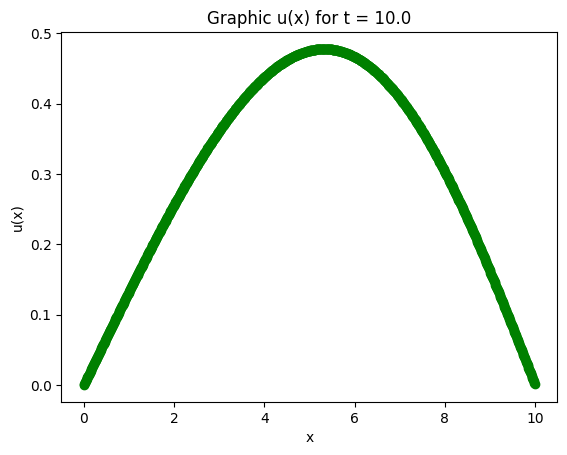

In [70]:
k = 1
T = 10
a = 10
dt = 1e-2
dx = 1e-2
Nt = int(T / dt)
Nx = int(a / dx)
c = k * dt / (2 * dx * dx)

def phi(x):
    if (x >= a / 2):
        return 2
    else:
        return 0

def three_diagonal_matrix():
    A = [[0.0 for x in range(Nx - 1)] for y in range(Nx - 1)]
    for i in range(Nx - 1):
        A[i][i] = 2 + 1 / c

        if (i != Nx - 2):
            A[i][i + 1] = -1

        if (i != 0):
            A[i][i - 1] = -1
            
    return A

def free_coeffs(tx_n):
    b = np.array([0.0 for i in range(Nx)])
    
    for i in range(1, Nx):
        if (i == 1):
            b[i] = (1 / c - 2) * tx_n[i] + tx_n[i + 1]
            
        if (i == Nx - 1):
            b[i] = (1 / c - 2) * tx_n[i] + tx_n[i - 1]
            
        if (i != 1 and i != Nx - 1):
            b[i] = (1 / c - 2) * tx_n[i] + tx_n[i + 1] + tx_n[i - 1]
        
    b = np.delete(b, 0)        
    return b
        
tx = np.array([[0.0 for x in range(0, Nx)] for t in range (0, Nt + 1)])

for x in range(0, Nx):
    tx[0][x] = phi(x * dx)

A = np.array(three_diagonal_matrix())
B = np.array(free_coeffs(tx[0]))
tx[1][1:Nx] = np.linalg.solve(A, B)
for n in range(2, Nt + 1):
    B = np.array(free_coeffs(tx[n - 1]))
    tx[n][1:Nx] = np.linalg.solve(A, B)

ts = Nt
x = np.array([a * i / Nx for i in range(Nx)])
plt.title("Graphic u(x) for t = {}".format(ts * dt))
plt.plot(x, tx[ts], 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u(x)")